# ML Activity
Darren S. Malibiran
CS - 4202

**Contents**
- [I. Libraries](#first)
- [II. Dataset](#second)
- [III. Data Preprocessing](#third)
- [IV. Features (`X`) and Target (`y`)](#fourth)
- [V. Train and Test subsets](#fifth)

## I. Libraries <a class="anchor" id="first"></a>

In [1]:
!pip install pandas numpy
!pip install scikit-learn
!pip install seaborn

## II. Dataset <a class="anchor" id="second"></a>
- Compute Hardware from UCI
- Variables:
    - VendorName: STR
    - MMAX (maximum main memory): INT
    - CACH (cache memory): INT
    - CHMAX (maximum channels): INT
    - PRP (published relative performance)
  
> Check complete details with `data.dtypes`

### Get the dataset
- You can download the file and upload it here or on GDrive (+ connect)
  - or simply download it in this Colab Session

In [2]:
!curl -o "harware.zip" https://archive.ics.uci.edu/static/public/29/computer+hardware.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4482    0  4482    0     0   4845      0 --:--:-- --:--:-- --:--:--  4845


In [3]:
!rm -rf machine*
!rm -rf Index
!unzip harware.zip

Archive:  harware.zip
  inflating: Index                   
  inflating: machine.data            
  inflating: machine.names           


In [4]:
# machine.data contains comma separated values. You can directly read it with pandas using read_csv. If you want, you can rename it as a CSV file
#!mv machine.data machine.csv

In [5]:
import pandas as pd
data = pd.read_csv("machine.data", names = ['vendor', 'model_name', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp', 'erp'])

### Explore the data

In [6]:
data.head()

,vendor,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [7]:
data.shape

(209, 10)

In [8]:
data.dtypes

vendor        object
model_name    object
myct           int64
mmin           int64
mmax           int64
cach           int64
chmin          int64
chmax          int64
prp            int64
erp            int64
dtype: object

## III. Data Preprocessing <a class="anchor" id="third"></a>

#### A. Remove Duplicates, if they exist

In [9]:
data[data.duplicated(keep = False)]

,vendor,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp


After checking, it seems that there are no rows that are duplicated

#### B. Drop NA values, if they exist

In [10]:
for index, i in enumerate(data.isnull().any(axis=1)):
  if i:
    print(f"Row {index} contains a Null value")

It seems that the data is clean. The rows from the dataset does not contain any missing value

## IV. Features (`X`) and Target (`y`) <a class="anchor" id="fourth"></a>
- Out of the dataset columns, I've made an assumption that the myct (machine cycle time), mmax (maximum main memory), cach (cache memory), and chmax (max channnel in unit) are the independent variables `X` with prp as the dependent variable `y`
  - The X reasonably affect y
  - The X attributes are independent of each other

In [11]:
selected_data = data[['myct', 'mmax', 'cach', 'chmax', 'prp']]

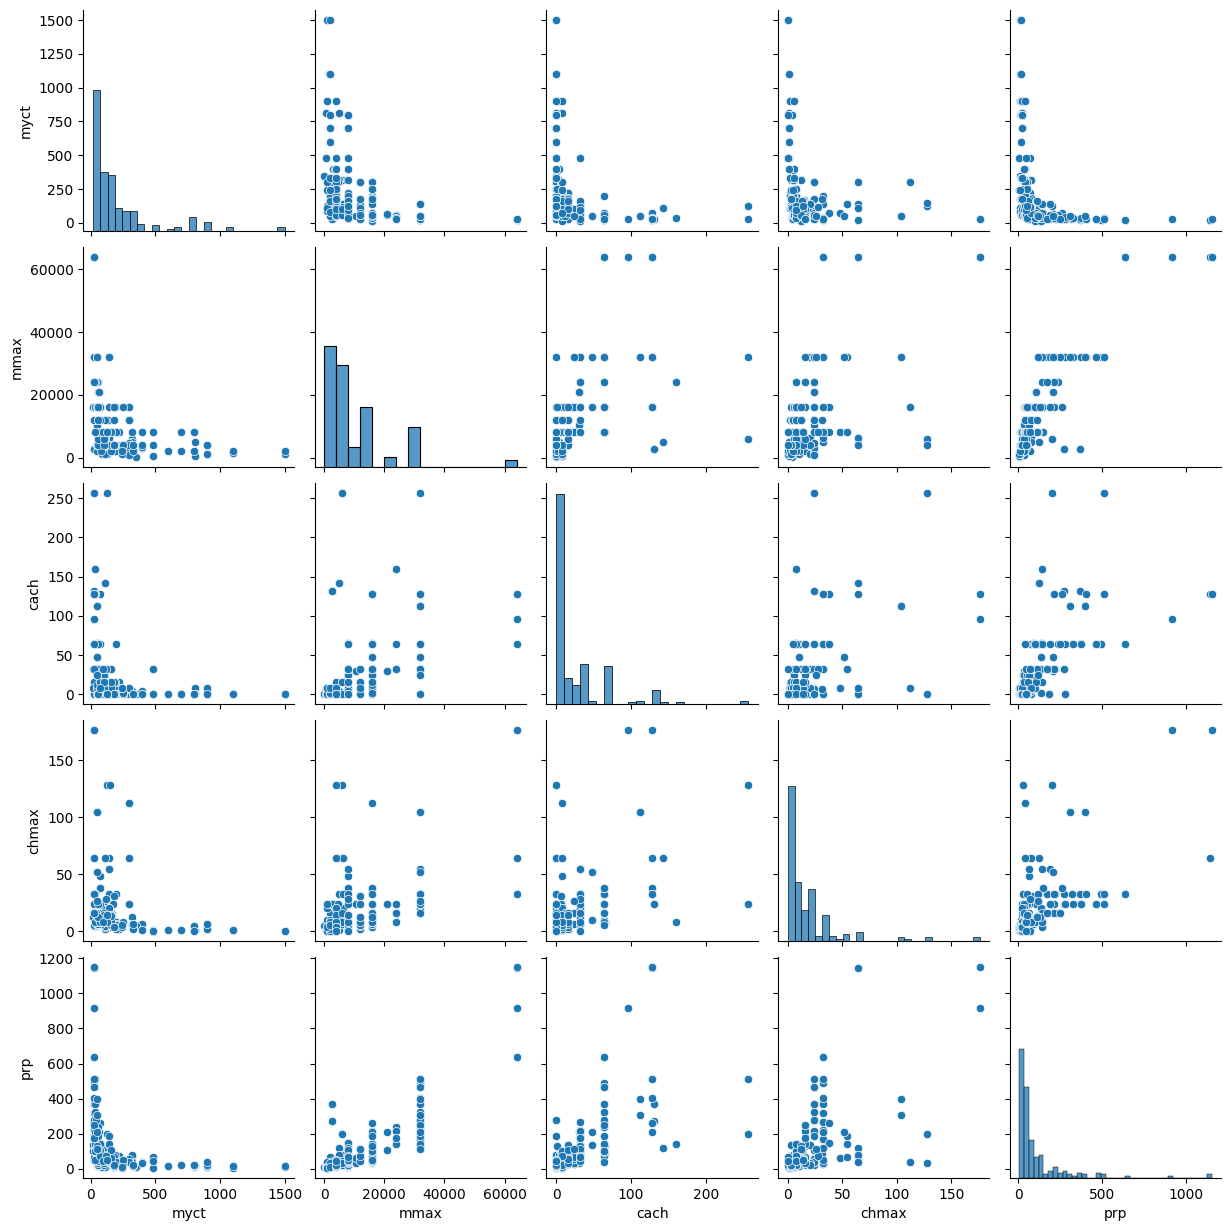

In [12]:
import seaborn as sns
sns.pairplot(selected_data)

#### A. Examine Column Relationships
- the area column will be the dependent variable while the other three (wind, RH [Relative Humidity], and rain) will be the X

In [13]:
import numpy as np

In [14]:
np.corrcoef(selected_data['myct'], selected_data['prp'])

array([[ 1.        , -0.30709945],
       [-0.30709945,  1.        ]])

In [15]:
np.corrcoef(selected_data['mmax'], selected_data['prp'])

array([[1.        , 0.86300412],
       [0.86300412, 1.        ]])

In [16]:
np.corrcoef(selected_data['cach'], selected_data['prp'])

array([[1.        , 0.66264143],
       [0.66264143, 1.        ]])

In [17]:
np.corrcoef(selected_data['chmax'], selected_data['prp'])

array([[1.        , 0.60520929],
       [0.60520929, 1.        ]])

- Out of the independent features I've initially selected, only machine cycle time (MYCT) seems to have a weak re (-0.3) to our dependent variable PRP (published relative performance). So, I'll remove it and finalize now the X and y variables
- Most of our datapoints are concentrated to the left but there's still enough higher values to make assumptions

In [18]:
final_data = data[['mmax', 'cach', 'chmax', 'prp']]

## V. Train and Test subsets <a class="anchor" id="fifth"></a>
- 80% train, 20% test

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt

In [20]:
train, test = train_test_split(final_data, test_size=0.2, random_state = 69)
y_test = test['prp']

## VI. Models <a class="anchor" id="sixth"></a>

In [21]:
from sklearn.linear_model import LinearRegression

#### A. mmax x prp

In [22]:
model_mmax = LinearRegression()
model_mmax.fit(train[['mmax']], train['prp'])

LinearRegression()

In [23]:
# Prediction 
x_test_mmax = test[['mmax']]
y_pred_mmax = model_mmax.predict(x_test_mmax)

# Scoring
_r2_score_mmax = r2_score(y_test, y_pred_mmax)
_mse_mmax = mean_squared_error(y_test, y_pred_mmax)
_rmse_mmax = root_mean_squared_error(y_test, y_pred_mmax)

print(f"R2 Score: {_r2_score_mmax}  |  MSE: {_mse_mmax}  |  RMSE: {_rmse_mmax}")

R2 Score: 0.5605219091039236  |  MSE: 8245.993191714371  |  RMSE: 90.80745119049632


Text(0, 0.5, 'Published Relative Performance (PRP)')

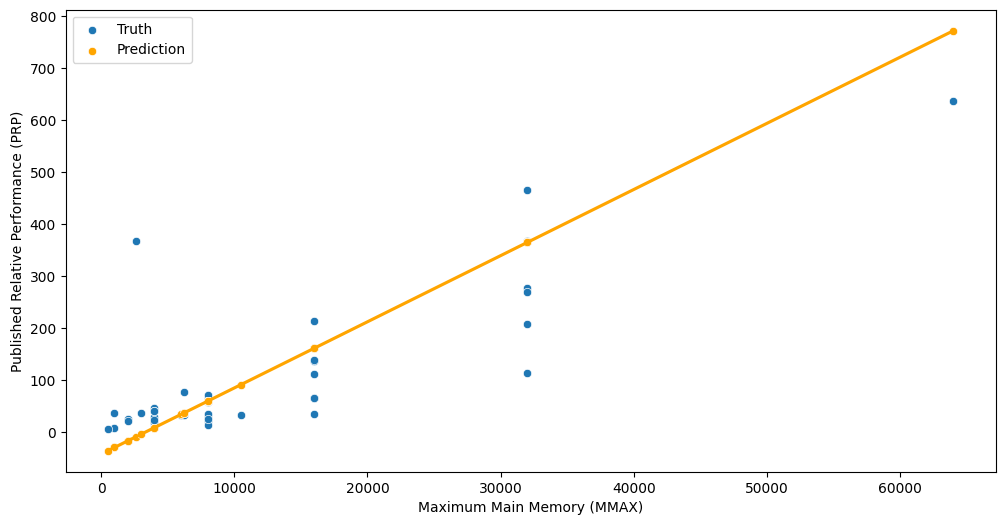

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=test['mmax'], y=test['prp'], label='Truth')
sns.scatterplot(x=test['mmax'], y=y_pred_mmax, label='Prediction', color = 'orange')
sns.regplot(x=test['mmax'], y=y_pred_mmax, scatter=False, color = 'orange')
plt.xlabel('Maximum Main Memory (MMAX)')
plt.ylabel('Published Relative Performance (PRP)')

#### B. cach x prp

In [25]:
model_cach = LinearRegression()
model_cach.fit(train[['cach']], train['prp'])

LinearRegression()

In [26]:
# Prediction 
x_test_cach = test[['cach']]
y_pred_cach = model_cach.predict(x_test_cach)

# Scoring
_r2_score_cach = r2_score(y_test, y_pred_cach)
_mse_cach = mean_squared_error(y_test, y_pred_cach)
_rmse_cach = root_mean_squared_error(y_test, y_pred_cach)

print(f"R2 Score: {_r2_score_cach}  |  MSE: {_mse_cach}  |  RMSE: {_rmse_cach}")

R2 Score: 0.46337781944053025  |  MSE: 10068.722284639864  |  RMSE: 100.3430230989672


Text(0, 0.5, 'Published Relative Performance (PRP)')

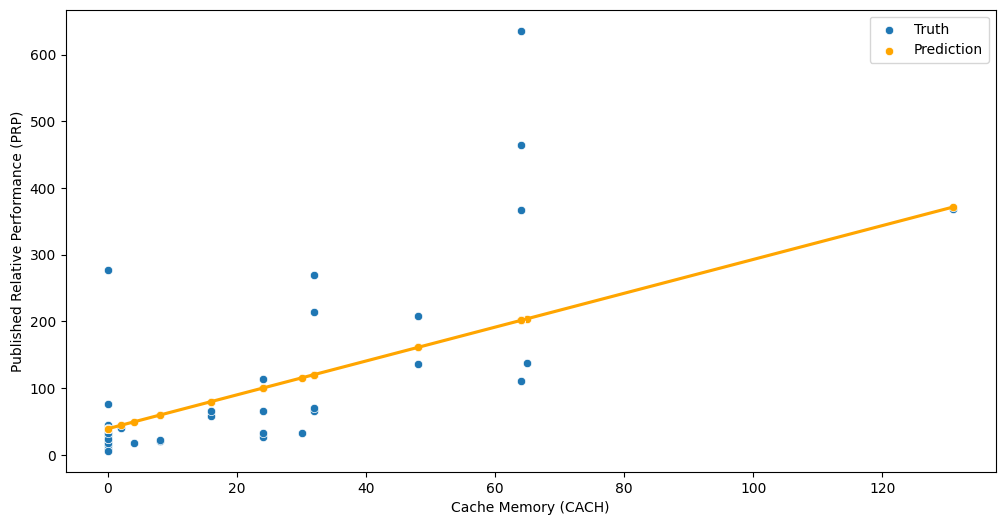

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=test['cach'], y=test['prp'], label='Truth')
sns.scatterplot(x=test['cach'], y=y_pred_cach, label='Prediction', color = 'orange')
sns.regplot(x=test['cach'], y=y_pred_cach, scatter=False, color = 'orange')
plt.xlabel('Cache Memory (CACH)')
plt.ylabel('Published Relative Performance (PRP)')

#### C. chmax x prp

In [28]:
model_chmax = LinearRegression()
model_chmax.fit(train[['chmax']], train['prp'])

LinearRegression()

In [29]:
# Prediction 
x_test_chmax = test[['chmax']]
y_pred_chmax = model_chmax.predict(x_test_chmax)

# Scoring
_r2_score_chmax = r2_score(y_test, y_pred_chmax)
_mse_chmax = mean_squared_error(y_test, y_pred_chmax)
_rmse_chmax = root_mean_squared_error(y_test, y_pred_chmax)

print(f"R2 Score: {_r2_score_chmax}  |  MSE: {_mse_chmax}  |  RMSE: {_rmse_chmax}")

R2 Score: 0.16605676953193071  |  MSE: 15647.401641102793  |  RMSE: 125.08957447006843


Text(0, 0.5, 'Published Relative Performance (PRP)')

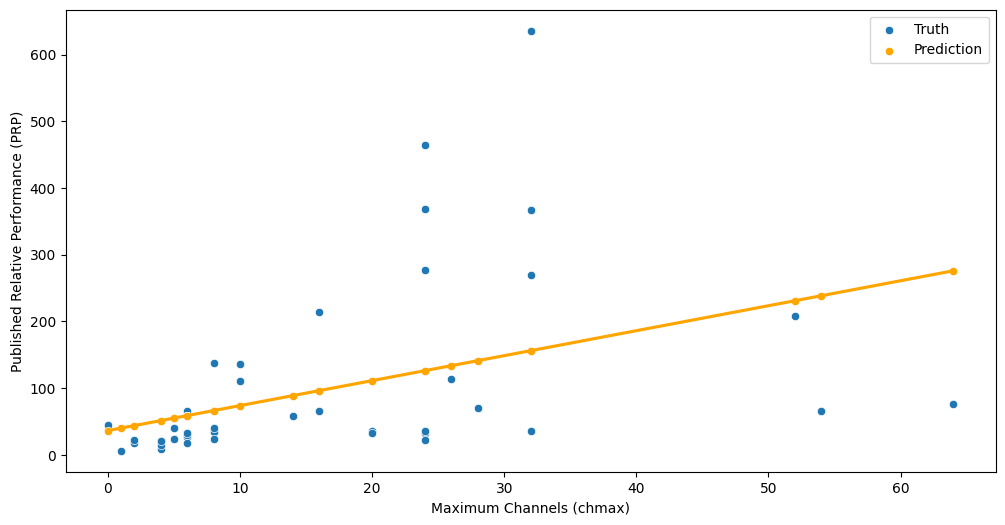

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=test['chmax'], y=test['prp'], label='Truth')
sns.scatterplot(x=test['chmax'], y=y_pred_chmax, label='Prediction', color = 'orange')
sns.regplot(x=test['chmax'], y=y_pred_chmax, scatter=False, color = 'orange')
plt.xlabel('Maximum Channels (chmax)')
plt.ylabel('Published Relative Performance (PRP)')

## VII. Multilinear Regression Model <a class="anchor" id="seventh"></a>
- The features (X) are independent of each other

In [31]:
model_multi = LinearRegression()
# Fit the model
model_multi.fit(train[['mmax', 'cach', 'chmax']], train['prp'])

LinearRegression()

In [32]:
# Prediction
x_test = test[['mmax', 'cach', 'chmax']]
y_prediction = model_multi.predict(x_test)

# Scoring
_r2_score = r2_score(y_test, y_prediction)
_mse = mean_squared_error(y_test, y_prediction)
_rmse = root_mean_squared_error(y_test, y_prediction)
print(f"R2 Score: {_r2_score}  |  MSE: {_mse}  |  RMSE: {_rmse}")

R2 Score: 0.7318405568629398  |  MSE: 5031.515764286436  |  RMSE: 70.9331781628769


## VIII. Saving the Model

In [33]:
from joblib import dump, load

In [37]:
dump(model_mmax, 'model_mmax.joblib')
dump(model_cach, 'model_cach.joblib')
dump(model_chmax, 'model_chmax.joblib')
dump(model_multi, 'model_multi.joblib')

['model_multi.joblib']

In [35]:
# Load the model
#model = load('model_multi.joblib')

In [36]:
# Concat the truth and prediction to a single dataset for visualization
#temp_data = pd.concat([x_test, pd.DataFrame({'prp_truth': y_test}).reset_index(drop = True), pd.DataFrame({'prp_prediction': y_prediction})], axis = 1)